In [7]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
MPL_COLOURS = ["b", "r", "g", "c", "y", "k", "m", "#D35400", "#117A65", "#A569BD"]
from tqdm import tnrange
import pandas
from astropy.io import fits

In [8]:
import soapy
import aotools

In [9]:
CONFIGFILE = "conf/simulation/sh6x6.yaml"

In [10]:
GS_MAGS = numpy.linspace(10, 25, 10)
E_READ_NOISE = numpy.linspace(0, 100, 10)

RUNS = 4
TEL_DIAM = 7.9
R0 = 0.20
WAVELENGTH = 500e-9
CENT_THRESHOLD = 0.1

(10, 10, 4)
(10,)


<IPython.core.display.Javascript object>


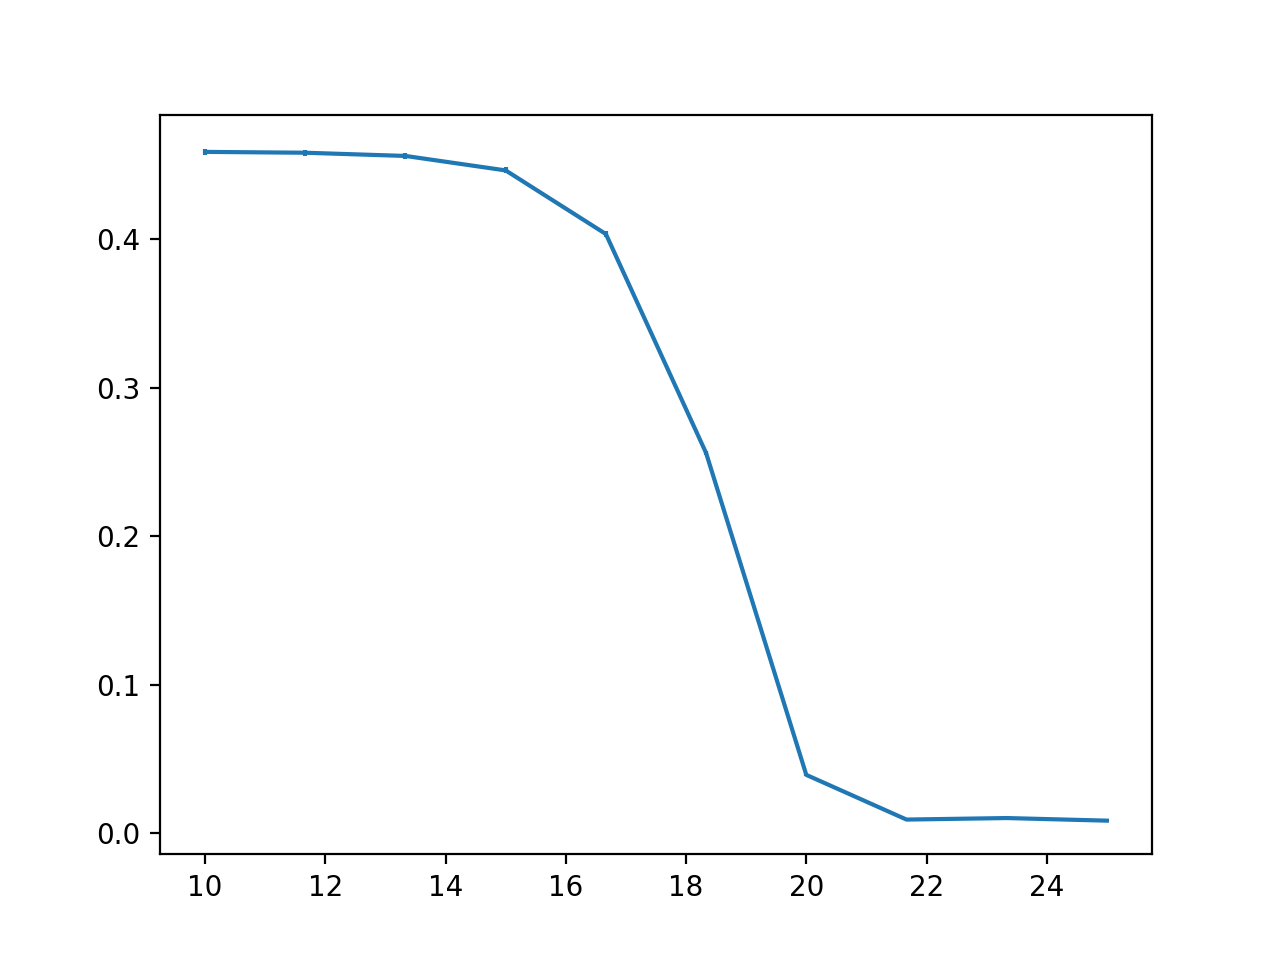

<IPython.core.display.Javascript object>


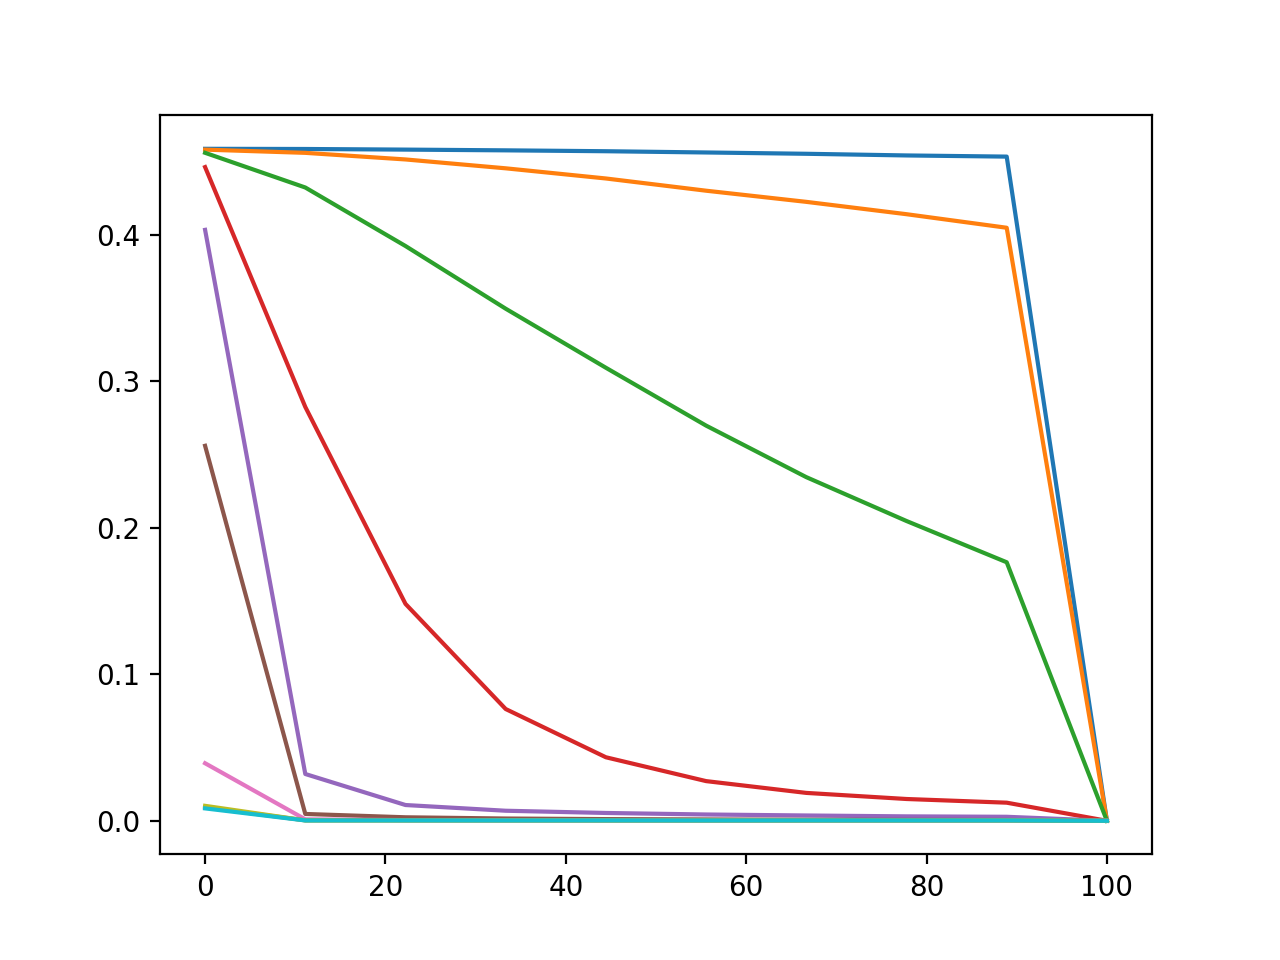

In [11]:
# Load some data from YAO for comparison
yao_result = fits.getdata("YAO_data/readNoise_YAO.fits")[:10]
print(yao_result.shape)
yao_photon_mean = yao_result[:, 0].mean(1)
yao_photon_err = yao_result[:,0].std(1)/(yao_result.shape[1]**0.5)
print(yao_photon_mean.shape)

pyplot.figure()
pyplot.errorbar(GS_MAGS, yao_photon_mean, yerr=yao_photon_err)
pyplot.show()

pyplot.figure()
pyplot.plot(E_READ_NOISE, yao_result.mean(2).T)

<IPython.core.display.Javascript object>


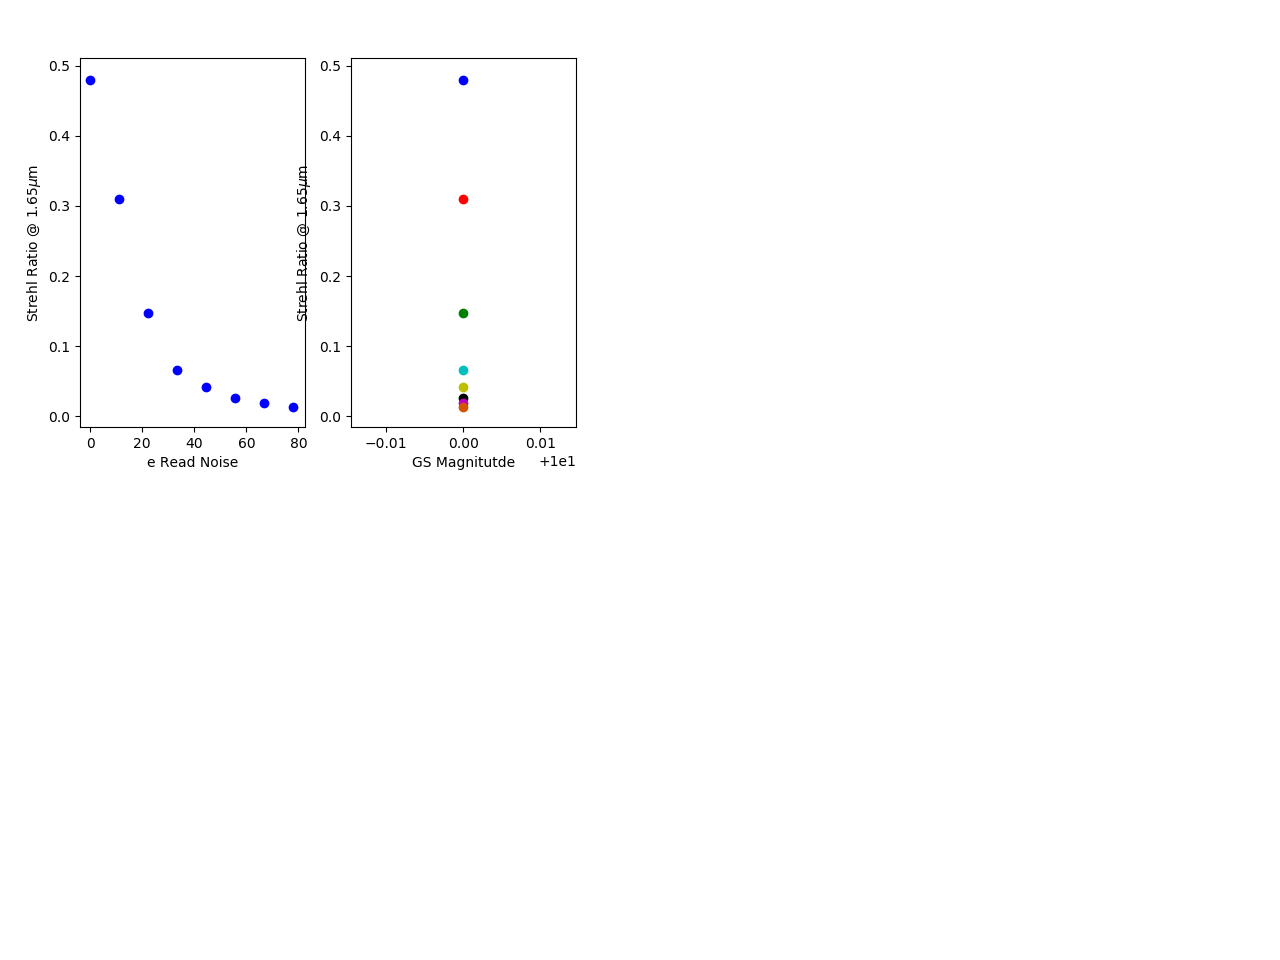


***
Set GS Mag to 10.0
***
***
Set EReadNoise to 0.0
***
1 of 1: Loaded configuration file successfully!Starting Sim: 2017-06-29-12-22-47
Pixel Scale: 15.19 pxls/m
subScreenSize: 122 simulation pixels
Creating mask...
Turbulence summary @ 500 nm:
| r0 = 0.19 m (0.55" seeing)
| Vbar_5/3 = 21.85 m/s
| tau0 = 2.67 ms
Initialise Infinite Phase Screen 1
Initialise Infinite Phase Screen 2
Initialise Infinite Phase Screen 3
Initialise Infinite Phase Screen 4
Initialising WFSs....
WFS 0: 64 measurements
Initialising 2 DMs...
Making DM Influence Functions...
DM 0: 2 active actuators
Making DM Influence Functions...
DM 1: 49 active actuators
51 total DM Actuators
Initialising Reconstructor...
Initialising 1 Science Cams...
Generating fftw3 plan....
If this takes too long, change fftw_FLAGS.
Done!
Initialise Data Storage...
Initialisation Complete!
Making interaction Matrices...
Creating Interaction Matrix for DM 0 
1 of 2: Generating 2 Actuator DM iMat
2 of 2: Generating 2 Actuator DM iMatCheck

Creating Interaction Matrix for DM 0 
1 of 2: Generating 2 Actuator DM iMat
2 of 2: Generating 2 Actuator DM iMatChecking for redundant actuators...
DM 0 has 2 valid actuators (0 dropped)
Creating Interaction Matrix for DM 1 
48 of 49: Generating 49 Actuator DM iMat
49 of 49: Generating 49 Actuator DM iMatChecking for redundant actuators...
DM 1 has 49 valid actuators (0 dropped)
Interaction Matrices Done
Creating Command Matrix
Invert iMat with conditioning: 0.0667
Command Matrix Generated!
4999 of 5000: sh6x6  Strehl -- sci_0: inst 0.08, long 0.04 
5000 of 5000: sh6x6  Strehl -- sci_0: inst 0.07, long 0.04 

Science Camera 0: Long Exposure Strehl Ratio: 0.04


Time moving atmosphere: 0.00
Time making IMats and CMats: 0.56
Time in WFS: 56.78
	 of which time spent in : 0.00
Time in Reconstruction: 0.18
Time in DM: 4.37
Time making science image: 89.80



***
Set GS Mag to 10.0
***
***
Set EReadNoise to 55.55555555555556
***
Pixel Scale: 15.19 pxls/m
subScreenSize: 122 simulation pixels

In [ ]:
data_frame = pandas.DataFrame()

fig = pyplot.figure()
ax1 = fig.add_subplot(1,2,1)
pyplot.xlabel("e Read Noise")
pyplot.ylabel("Strehl Ratio @ 1.65$\mu$m")

ax2 = fig.add_subplot(1,2,2)
pyplot.xlabel("GS Magnitutde")
pyplot.ylabel("Strehl Ratio @ 1.65$\mu$m")

for r in tnrange(RUNS):
    for n_mag in tnrange(len(GS_MAGS)):
        for n_rn in tnrange(len(E_READ_NOISE)):
            gs_mag = GS_MAGS[n_mag]
            e_rn = E_READ_NOISE[n_rn]
            print('\n***\nSet GS Mag to {}\n***'.format(gs_mag))
            print('***\nSet EReadNoise to {}\n***'.format(e_rn))

            sim = soapy.Sim(CONFIGFILE)
            
            sim.aoinit()
            
            sim.config.wfss[0].centThreshold = CENT_THRESHOLD
            
            # Make iMat with no noise
            sim.makeIMat()
            
            sim.config.wfss[0].photonNoise = True
            sim.config.wfss[0].GSMag = gs_mag
            sim.config.wfss[0].eReadNoise = e_rn

            sim.aoloop()

            data_series = pandas.Series(dict(sim.config.sim.saveHeader))
            data_series["gs_mag"] = gs_mag
            data_series["e_readnoise"] = e_rn
            data_series["long_strehl"] = sim.longStrehl[0][-1]
            data_series["wavefront_error"] = sim.WFE[0][-1]
            data_series["cent_threshold"] = CENT_THRESHOLD

            data_frame = data_frame.append(data_series, ignore_index=True)
            ax1.scatter(e_rn, sim.longStrehl[0][-1], color=MPL_COLOURS[n_mag])
            ax2.scatter(gs_mag, sim.longStrehl[0][-1], color=MPL_COLOURS[n_rn])

            fig.canvas.draw()

In [ ]:
long_strehls = numpy.zeros((10, 10, 4))
for i in range(10):
    gs = GS_MAGS[i]
    for j in range(10):
        e_rn = E_READ_NOISE[j]team
        print(long_strehls.shape)
        long_strehls[i, j] = data_frame[data_frame.gs_mag==gs][data_frame.e_readnoise==e_rn]

In [ ]:
data_frame.gs_mag